### **ML Lab Assignment 4**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score, mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score

## IRIS DATASET

In [ ]:
# IRIS DATASET
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
def scale_data(X):
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X = sc.fit_transform(X)
  return X

In [ ]:
X = scale_data(X)

In [ ]:
X[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

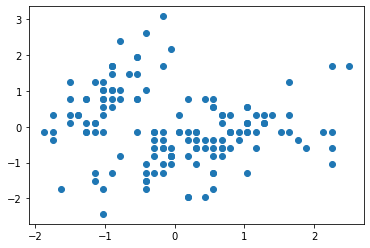

In [ ]:
plt.scatter(X[:,0], X[:,1], label='True Position')
plt.show()

### Partition Based

K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
n_clusters = 3

In [ ]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print("KMeans Cluster Center:")
print(kmeans.cluster_centers_)

KMeans Cluster Center:
[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


In [ ]:
print("Cluster Labels:")
print(kmeans.labels_)

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


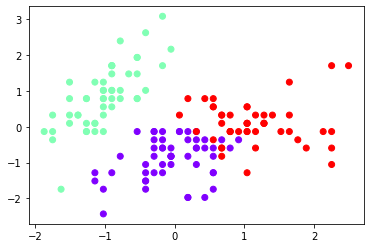

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

In [ ]:
print(f"For n_clusters = {n_clusters}, Silhouette Score: {silhouette_score(X, kmeans.labels_)}")

For n_clusters = 3, Silhouette Score: 0.45994823920518635


In [ ]:
print(f"For n_clusters = {n_clusters}, Calinski-Harabasz Score: {calinski_harabasz_score(X, kmeans.labels_)}")

For n_clusters = 3, Calinski-Harabasz Score: 241.90440170183157


In [ ]:
print(f"For n_clusters = {n_clusters}, Davies-Bouldin Score: {davies_bouldin_score(X, kmeans.labels_)}")

For n_clusters = 3, Davies-Bouldin Score: 0.8335949464754334


K-Medoids

In [ ]:
!python3 -m pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 5.5 MB/s 
     |████████████████████████████████| 23.2 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
n_clusters = 3

In [ ]:
kmeds = KMedoids(n_clusters=n_clusters)
kmeds.fit(X)

KMedoids(init='heuristic', max_iter=300, method='alternate', metric='euclidean',
         n_clusters=3, random_state=None)

In [ ]:
print("KMediods Cluster Center:")
print(kmeds.cluster_centers_)

KMediods Cluster Center:
[[-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-0.17367395 -0.59237301  0.42173371  0.13250973]
 [ 1.2803405   0.09821729  0.93327055  1.18556721]]


In [ ]:
print("Cluster Labels:")
print(kmeds.labels_)

Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


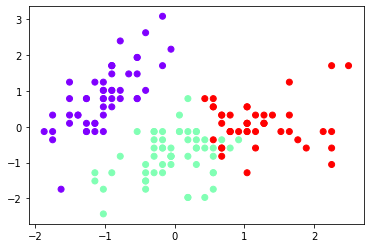

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeds.labels_, cmap='rainbow')
plt.show()

In [ ]:
print(f"For n_clusters = {n_clusters}, Silhouette Score: {silhouette_score(X, kmeds.labels_)}")

For n_clusters = 3, Silhouette Score: 0.4590416105554613


In [ ]:
print(f"For n_clusters = {n_clusters}, Calinski-Harabasz Score: {calinski_harabasz_score(X, kmeds.labels_)}")

For n_clusters = 3, Calinski-Harabasz Score: 239.7482681281416


In [ ]:
print(f"For n_clusters = {n_clusters}, Davies-Bouldin Score: {davies_bouldin_score(X, kmeds.labels_)}")

For n_clusters = 3, Davies-Bouldin Score: 0.8384547897989041


In [ ]:
from ass_4 import evaluation_metrics_1, evaluation_metrics_2
evaluation_metrics_1(X, kmeds)
evaluation_metrics_2(X, kmeds)

Evaluation Metrics:
-----------------------------------
-----------------------------------
Silhouette Score: 0.4590416105554613
-----------------------------------
Calinski-Harabasz Score: 239.7482681281416
-----------------------------------
Davies-Bouldin Score: 0.8384547897989041
-----------------------------------
Cohesion Score:  148.61035574513318
-----------------------------------
Seperation Score 451.38964425486694
-----------------------------------


### KMeans++

In [ ]:
X[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

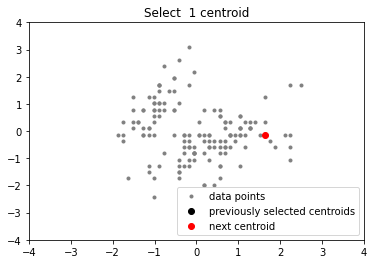

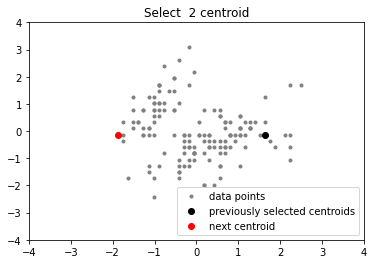

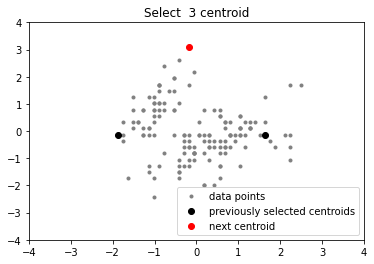

In [ ]:
import sys
# function to plot the selected centroids
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],
                color = 'black', label = 'previously selected centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1],
                color = 'red', label = 'next centroid')
    plt.title('Select % d centroid'%(centroids.shape[0]))
     
    plt.legend()
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.show()
          
# function to compute euclidean distance
def distance(p1, p2):
    return np.sum((p1 - p2)**2)
  
# initialization algorithm
def initialize(data, k):
    '''
    initialized the centroids for K-means++
    inputs:
        data - numpy array of data points having shape (200, 2)
        k - number of clusters
    '''
    ## initialize the centroids list and add
    ## a randomly selected data point to the list
    centroids = []
    centroids.append(data[np.random.randint(
            data.shape[0]), :])
    plot(data, np.array(centroids))
  
    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):
         
        ## initialize a list to store distances of data
        ## points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize
             
            ## compute distance of 'point' from each of the previously
            ## selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)
             
        ## select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plot(data, np.array(centroids))
    return centroids
  
# call the initialize function to get the centroids
centroids = initialize(X, k = 3)

In [ ]:
centroids = np.asarray(centroids)

In [ ]:
kmeans_pp = KMeans(n_clusters=3, init=centroids)
kmeans_pp.fit(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


KMeans(algorithm='auto', copy_x=True,
       init=array([[ 1.64384411, -0.13197948,  1.16062026,  0.52740629],
       [-1.87002413, -0.13197948, -1.51073881, -1.44707648],
       [-0.17367395,  3.09077525, -1.2833891 , -1.05217993]]),
       max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [ ]:
print("KMediods Cluster Center:")
print(kmeans_pp.cluster_centers_)

KMediods Cluster Center:
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]]


In [ ]:
print("Cluster Labels:")
print(kmeans_pp.labels_)

Cluster Labels:
[2 1 1 1 2 2 2 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 1 1 2
 2 1 2 2 1 1 2 2 1 2 1 2 2 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


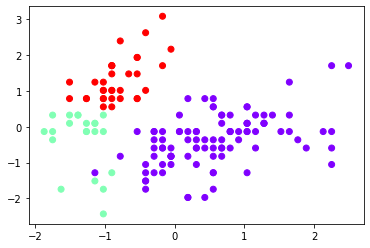

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeans_pp.labels_, cmap='rainbow')
plt.show()

In [ ]:
print(f"For n_clusters = {n_clusters}, Silhouette Score: {silhouette_score(X, kmeans_pp.labels_)}")

For n_clusters = 3, Silhouette Score: 0.4630420362927048


In [ ]:
print(f"For n_clusters = {n_clusters}, Calinski-Harabasz Score: {calinski_harabasz_score(X, kmeans_pp.labels_)}")

For n_clusters = 3, Calinski-Harabasz Score: 241.42632349435513


In [ ]:
print(f"For n_clusters = {n_clusters}, Davies-Bouldin Score: {davies_bouldin_score(X, kmeans_pp.labels_)}")

For n_clusters = 3, Davies-Bouldin Score: 0.8324162130910141


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
from ass_4 import evaluation_metrics_1, evaluation_metrics_2
evaluation_metrics_1(X, kmeans_pp)
evaluation_metrics_2(X, kmeans_pp)

Evaluation Metrics:
-----------------------------------
-----------------------------------
Silhouette Score: 0.4798814508199816
-----------------------------------
Calinski-Harabasz Score: 157.36015312192248
-----------------------------------
Davies-Bouldin Score: 0.7893630242997912
-----------------------------------
Cohesion Score:  191.02473685317966
-----------------------------------
Seperation Score 408.97526314682045
-----------------------------------


In [ ]:
!python /content/drive/MyDrive/ass_4.py

Evaluation Metrics:
-----------------------------------
-----------------------------------
Silhouette Score: 0.45994823920518635
-----------------------------------
Calinski-Harabasz Score: 241.90440170183157
-----------------------------------
Davies-Bouldin Score: 0.8335949464754334
-----------------------------------
Cohesion Score:  139.82049635974982
-----------------------------------
Seperation Score 460.1795036402503
-----------------------------------


### Bisecting K-Means

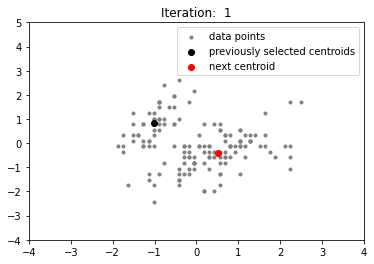

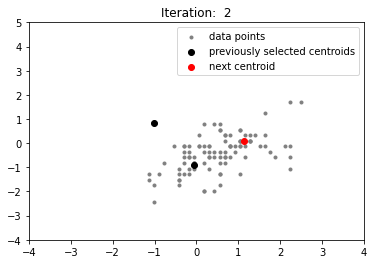

In [ ]:
from sklearn.cluster import KMeans

def plot(data, centroids, next_centroid):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                color = 'black', label = 'previously selected centroids')
    plt.scatter(next_centroid[0], next_centroid[1],
                color = 'red', label = 'next centroid')
    plt.title('Iteration: % d'%(centroids.shape[0]))
     
    plt.legend()
    plt.xlim(-4, 4)
    plt.ylim(-4, 5)
    plt.show()

K = 3
current_clusters = 1
centroids = []
clusters = []
X_ = X
labels = []
label = 0
while current_clusters != K:
    kmeans = KMeans(n_clusters=2).fit(X_)
    current_clusters += 1
    # split += 1
    cluster_centers = kmeans.cluster_centers_
    # print(cluster_centers)

    # identify next cluster for kmeans
    sse = [0]*2
    for point, label in zip(X_, kmeans.labels_):
        sse[label] += np.square(point-cluster_centers[label]).sum()
    chosen_cluster = np.argmax(sse, axis=0)
    # print(chosen_cluster)

    # save the other cluster
    centroids.append(cluster_centers[1-chosen_cluster])
    clusters.append(X_[kmeans.labels_ == 1-chosen_cluster])

    # reassign chosen cluster for next iteration
    plot(X_, np.array(centroids), cluster_centers[chosen_cluster])
    chosen_cluster_data = X_[kmeans.labels_ == chosen_cluster]
    X_ = chosen_cluster_data
    # plot_data = clusters.append(X_)

centroids.append(X_.mean(0))
clusters.append(X_)

In [ ]:
centroids

[array([-1.01457897,  0.85326268, -1.30498732, -1.25489349]),
 array([-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]),
 array([1.13597027, 0.08842168, 0.99615451, 1.01752612])]

In [ ]:
for cluster in clusters:
  print(cluster.shape[0])

50
53
47


In [ ]:
labels = np.zeros(X.shape[0])
labels[clusters[0].shape[0]:clusters[0].shape[0]+clusters[1].shape[0]] = 1
labels[clusters[0].shape[0]+clusters[1].shape[0]:] = 2

In [ ]:
labels = labels.astype(int)

In [ ]:
X_ = np.array([item for sublist in clusters for item in sublist])


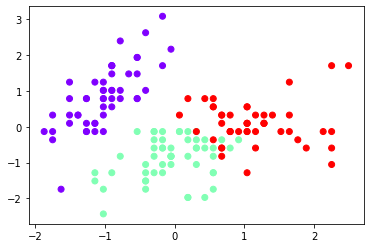

In [ ]:
plt.scatter(X_[:,0], X_[:,1], c=labels, cmap='rainbow')
plt.show()

In [ ]:
print(f"Silhouette Score: {silhouette_score(X, labels)}")

Silhouette Score: 0.36401782604954924


In [ ]:
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X, labels)}")

Calinski-Harabasz Score: 181.1171183165638


In [ ]:
print(f"Davies-Bouldin Score: {davies_bouldin_score(X, labels)}")

Davies-Bouldin Score: 1.147030344116083


In [ ]:
from scipy.cluster.vq import vq
codebook = centroids
partition, euc_distance_to_centroids = vq(X_, codebook)

tss = np.sum((X_-X_.mean(0))**2)
sse = np.sum(euc_distance_to_centroids**2)
ssb = tss - sse
print("Cohesion Score: ", sse)
print('-----------------------------------')
print("Seperation Score", ssb)
print('-----------------------------------')


Cohesion Score:  139.82049635974982
-----------------------------------
Seperation Score 460.1795036402504
-----------------------------------


In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

### Hierarchical

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
linked = linkage(X, 'single')

In [ ]:
labelList = range(1, 4)

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation ='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

AGNES - Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [ ]:
print("Cluster Labels:")
print(cluster.labels_)

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


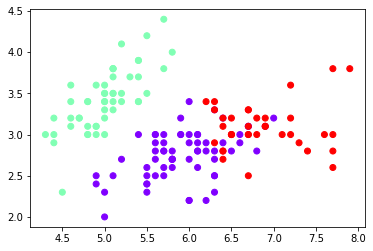

In [ ]:
plt.scatter(X[:,0], X[:, 1], c=cluster.labels_, cmap='rainbow')
plt.show()

In [ ]:
print(f"For n_clusters = {n_clusters}, Silhouette Score: {silhouette_score(X, cluster.labels_)}")

For n_clusters = 3, Silhouette Score: 0.5543236611296415


In [ ]:
print(f"For n_clusters = {n_clusters}, Calinski-Harabasz Score: {calinski_harabasz_score(X, cluster.labels_)}")

For n_clusters = 3, Calinski-Harabasz Score: 558.0580408128307


In [ ]:
print(f"For n_clusters = {n_clusters}, Davies-Bouldin Score: {davies_bouldin_score(X, cluster.labels_)}")

For n_clusters = 3, Davies-Bouldin Score: 0.6562564540642065


BIRCH

In [ ]:
from sklearn.cluster import Birch

In [ ]:
n_clusters = 3

In [ ]:
birch = Birch(n_clusters=n_clusters)
birch.fit(X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
      threshold=0.5)

In [ ]:
print("Cluster Labels:")
print(birch.labels_)

Cluster Labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


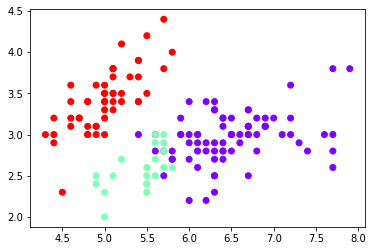

In [ ]:
plt.scatter(X[:,0], X[:,1], c=birch.labels_, cmap='rainbow')
plt.show()

In [ ]:
print(f"For n_clusters = {n_clusters}, Silhouette Score: {silhouette_score(X, birch.labels_)}")

For n_clusters = 3, Silhouette Score: 0.5019524848046075


In [ ]:
print(f"For n_clusters = {n_clusters}, Calinski-Harabasz Score: {calinski_harabasz_score(X, birch.labels_)}")

For n_clusters = 3, Calinski-Harabasz Score: 458.47251055625765


In [ ]:
print(f"For n_clusters = {n_clusters}, Davies-Bouldin Score: {davies_bouldin_score(X, birch.labels_)}")

For n_clusters = 3, Davies-Bouldin Score: 0.6258305924331691


### Density based Clustering

DBSCAN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


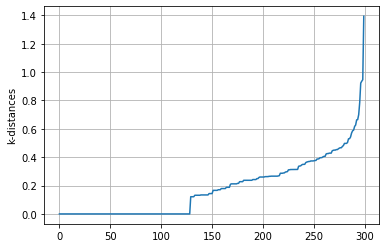

In [ ]:
def k_distances2(x, k):
    dim0 = x.shape[0]
    dim1 = x.shape[1]
    p=-2*x.dot(x.T)+np.sum(x**2, axis=1).T+ np.repeat(np.sum(x**2, axis=1),dim0,axis=0).reshape(dim0,dim0)
    p = np.sqrt(p)
    p.sort(axis=1)
    p=p[:,:k]
    pm= p.flatten()
    pm= np.sort(pm)
    return p, pm
m, m2= k_distances2(X, 2)
plt.plot(m2)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=8).fit(X)

In [ ]:
print("Cluster Labels:")
print(dbscan.labels_)

Cluster Labels:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1 -1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1 -1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


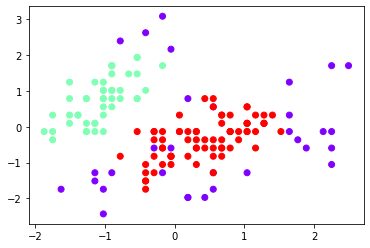

In [ ]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.show()

In [ ]:
print(f"Silhouette Score: {silhouette_score(X, dbscan.labels_)}")

Silhouette Score: 0.362376823123382


In [ ]:
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X, dbscan.labels_)}")

Calinski-Harabasz Score: 84.33804491999796


In [ ]:
print(f"Davies-Bouldin Score: {davies_bouldin_score(X, dbscan.labels_)}")

Davies-Bouldin Score: 7.673865381740794


**ROUGH**

In [ ]:
!python3 ass4.py

Performance Evaluation:
-----------------------------------
-----------------------------------
Silhouette Coefficient
0.4331447303818133
-----------------------------------
Calinski Harabasz Score
155.78362790355087
-----------------------------------
Davies Bouldin Score
0.8185417093133035
-----------------------------------
Cohesion Score
424.24867916368026
-----------------------------------
Seperation Score
5594.114581997901
-----------------------------------
1323.4459359447349 424.24867916367975 899.1972567810551 899.197256781056


In [ ]:
!python /content/drive/MyDrive/ass_4.py

<Figure size 640x480 with 1 Axes>
KMEANS
<Figure size 640x480 with 1 Axes>
Evaluation Metrics:
-----------------------------------
-----------------------------------
Silhouette Score: 0.45994823920518635
-----------------------------------
Calinski-Harabasz Score: 241.90440170183157
-----------------------------------
Davies-Bouldin Score: 0.8335949464754334
-----------------------------------
Cohesion Score:  139.82049635974982
-----------------------------------
Seperation Score 460.1795036402503
-----------------------------------
AGNES
<Figure size 640x480 with 1 Axes>
Evaluation Metrics:
-----------------------------------
-----------------------------------
Silhouette Score: 0.4466890410285909
-----------------------------------
Calinski-Harabasz Score: 222.71916382215363
-----------------------------------
Davies-Bouldin Score: 0.8034665302876753
-----------------------------------
Cohesion Score:  146.5143826153116
-----------------------------------
Seperation Score 453.48561

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans

from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def preprocess_data(key):
    data_dict = {
        'iris': load_iris(),
        'wine': load_wine()
    }

    data = data_dict[key]
    X = scale(data.data)
    y = data.target

    return X, y

def display_scatter_plot(X, model=None, clustered=False):
    if not clustered:
        plt.scatter(X[:,0], X[:,1], label='True Position')
        plt.show()
    else:
        plt.scatter(X[:,0], X[:,1], c=model.labels_, cmap='rainbow')
        plt.show()

def evaluation_metrics_1(X, model):
    print("Evaluation Metrics:")
    print("-----------------------------------")
    print("-----------------------------------")
    print(f"Silhouette Score: {silhouette_score(X, model.labels_)}")
    print("-----------------------------------")
    print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X, model.labels_)}")
    print("-----------------------------------")
    print(f"Davies-Bouldin Score: {davies_bouldin_score(X, model.labels_)}")
    print("-----------------------------------")


def evaluation_metrics_2(X, model, kmeans=True):
    from scipy.cluster.vq import vq
    n_clusters = 3
    if kmeans:
      codebook = model.cluster_centers_
    else:
      # labels = model.labels_
      # labels[labels == -1] = 2
      codebook = []
      for i in np.unique(model.labels_):
        cluster_data = X[model.labels_ == i]
        centroid = cluster_data.mean(0)
        codebook.append(centroid)

    partition, euc_distance_to_centroids = vq(X, codebook)

    tss = np.sum((X-X.mean(0))**2)
    sse = np.sum(euc_distance_to_centroids**2)
    ssb = tss - sse
    print("Cohesion Score: ", sse)
    print('-----------------------------------')
    print("Seperation Score", ssb)
    print('-----------------------------------')

def create_dendrogram(X, y):
    from scipy.cluster.hierarchy import dendrogram, linkage
    linked = linkage(X, 'single')
    labelList = range(X.shape[0]+1)

    dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True)
    plt.savefig("dgram_iris.png")

print("IRIS DATASET")
X, y = preprocess_data('wine')
display_scatter_plot(X)
n_clusters = 2

print("KMEANS")
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters).fit(X)
display_scatter_plot(X, kmeans, True)
evaluation_metrics_1(X=X, model=kmeans)
evaluation_metrics_2(X=X, model=kmeans)

print("AGNES")
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward').fit(X)
display_scatter_plot(X, cluster, True)
evaluation_metrics_1(X=X, model=cluster)
evaluation_metrics_2(X=X, model=cluster, kmeans=False)

print("BIRCH")
from sklearn.cluster import Birch
birch = Birch(n_clusters=n_clusters).fit(X)
display_scatter_plot(X, birch, True)
evaluation_metrics_1(X=X, model=birch)
evaluation_metrics_2(X=X, model=birch, kmeans=False)

print("DBSCAN")
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=8).fit(X)
display_scatter_plot(X, dbscan, True)
evaluation_metrics_1(X=X, model=dbscan)
evaluation_metrics_2(X=X, model=dbscan, kmeans=False)

print("OPTICS")
from sklearn.cluster import OPTICS
optics = OPTICS(min_samples=8, max_eps=0.6).fit(X)
display_scatter_plot(X, optics, True)
evaluation_metrics_1(X=X, model=optics)
evaluation_metrics_2(X=X, model=optics, kmeans=False)


## WINE DATASET

In [ ]:
# IRIS DATASET
wine = load_wine()
X = wine.data
y = wine.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
def scale_data(X):
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X = sc.fit_transform(X)
  return X

In [ ]:
X = scale_data(X)

In [ ]:
X[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

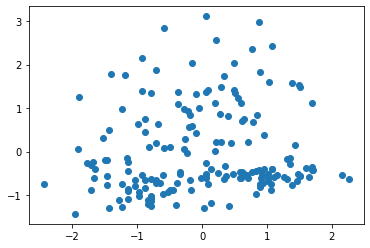

In [ ]:
plt.scatter(X[:,0], X[:,1], label='True Position')
plt.show()

### Partition Based

K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
n_clusters = 3

In [ ]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print("KMeans Cluster Center:")
print(kmeans.cluster_centers_)

KMeans Cluster Center:
[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


In [ ]:
print("Cluster Labels:")
print(kmeans.labels_)

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


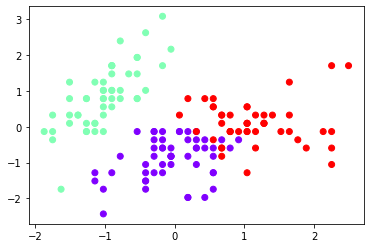

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

In [ ]:
print(f"For n_clusters = {n_clusters}, Silhouette Score: {silhouette_score(X, kmeans.labels_)}")

For n_clusters = 3, Silhouette Score: 0.45994823920518635


In [ ]:
print(f"For n_clusters = {n_clusters}, Calinski-Harabasz Score: {calinski_harabasz_score(X, kmeans.labels_)}")

For n_clusters = 3, Calinski-Harabasz Score: 241.90440170183157


In [ ]:
print(f"For n_clusters = {n_clusters}, Davies-Bouldin Score: {davies_bouldin_score(X, kmeans.labels_)}")

For n_clusters = 3, Davies-Bouldin Score: 0.8335949464754334


K-Medoids

In [ ]:
!python3 -m pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 28.7 MB/s 
     |████████████████████████████████| 23.2 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
n_clusters = 3

In [ ]:
kmeds = KMedoids(n_clusters=n_clusters)
kmeds.fit(X)

KMedoids(init='heuristic', max_iter=300, method='alternate', metric='euclidean',
         n_clusters=3, random_state=None)

In [ ]:
print("KMediods Cluster Center:")
print(kmeds.cluster_centers_)

KMediods Cluster Center:
[[ 4.93342620e-01  1.41260912e+00  4.14819587e-01  1.05251577e+00
   1.58571702e-01 -7.93334154e-01 -1.28434417e+00  5.49107795e-01
  -3.16950051e-01  9.69783022e-01 -1.12951789e+00 -1.48544548e+00
   9.89339909e-03]
 [-9.27212090e-01 -5.44296535e-01 -9.01103141e-01 -1.48624201e-01
  -1.38612179e+00 -1.03368389e+00  7.33234123e-04  6.56394314e-02
   6.85084581e-02 -7.17239912e-01  1.86683727e-01  7.88587455e-01
  -7.54385098e-01]
 [ 5.92163817e-01 -4.72483484e-01  1.58945723e-01  3.01803287e-01
   1.81450206e-02  6.48764240e-01  9.54501620e-01 -8.20719236e-01
   4.71487808e-01  1.81290590e-02  3.62177276e-01  1.21232030e+00
   5.51257335e-01]]


In [ ]:
print("Cluster Labels:")
print(kmeds.labels_)

Cluster Labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 1 2 1 1 1 2 1 2 1 2
 2 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 0 1 2 1 1 1 1 1 1 1 1 1 1 2 2
 1 1 1 1 1 1 1 1 1 2 2 0 1 2 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


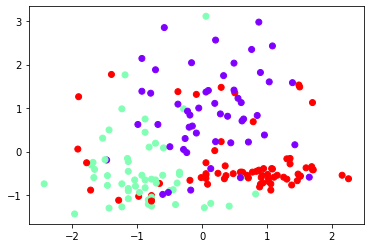

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeds.labels_, cmap='rainbow')
plt.show()

In [ ]:
print(f"For n_clusters = {n_clusters}, Silhouette Score: {silhouette_score(X, kmeds.labels_)}")

For n_clusters = 3, Silhouette Score: 0.26597740204536796


In [ ]:
print(f"For n_clusters = {n_clusters}, Calinski-Harabasz Score: {calinski_harabasz_score(X, kmeds.labels_)}")

For n_clusters = 3, Calinski-Harabasz Score: 66.7519655942218


In [ ]:
print(f"For n_clusters = {n_clusters}, Davies-Bouldin Score: {davies_bouldin_score(X, kmeds.labels_)}")

For n_clusters = 3, Davies-Bouldin Score: 1.415990244064887


In [ ]:
from scipy.cluster.vq import vq
codebook = kmeds.cluster_centers_
partition, euc_distance_to_centroids = vq(X, codebook)

tss = np.sum((X-X.mean(0))**2)
sse = np.sum(euc_distance_to_centroids**2)
ssb = tss - sse
print("Cohesion Score: ", sse)
print('-----------------------------------')
print("Seperation Score", ssb)
print('-----------------------------------')

Cohesion Score:  1564.6063492696073
-----------------------------------
Seperation Score 749.3936507303927
-----------------------------------


### KMeans++

In [ ]:
X[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

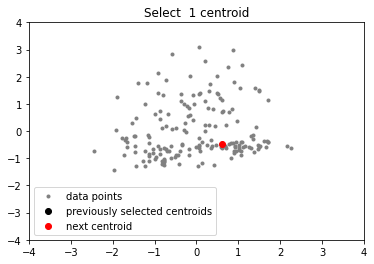

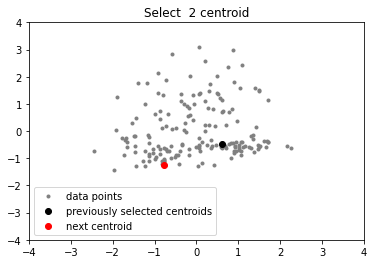

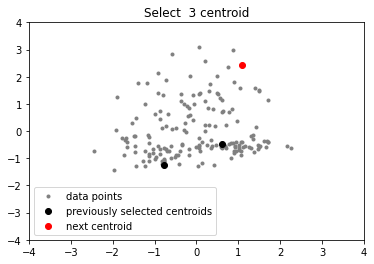

In [ ]:
import sys
# function to plot the selected centroids
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],
                color = 'black', label = 'previously selected centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1],
                color = 'red', label = 'next centroid')
    plt.title('Select % d centroid'%(centroids.shape[0]))
     
    plt.legend()
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.show()
          
# function to compute euclidean distance
def distance(p1, p2):
    return np.sum((p1 - p2)**2)
  
# initialization algorithm
def initialize(data, k):
    '''
    initialized the centroids for K-means++
    inputs:
        data - numpy array of data points having shape (200, 2)
        k - number of clusters
    '''
    ## initialize the centroids list and add
    ## a randomly selected data point to the list
    centroids = []
    centroids.append(data[np.random.randint(
            data.shape[0]), :])
    plot(data, np.array(centroids))
  
    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):
         
        ## initialize a list to store distances of data
        ## points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize
             
            ## compute distance of 'point' from each of the previously
            ## selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)
             
        ## select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plot(data, np.array(centroids))
    return centroids
  
# call the initialize function to get the centroids
centroids = initialize(X, k = 3)

In [ ]:
centroids = np.asarray(centroids)

In [ ]:
from sklearn.cluster import KMeans
kmeans_pp = KMeans(n_clusters=3, init=centroids)
kmeans_pp.fit(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  This is separate from the ipykernel package so we can avoid doing imports until


KMeans(algorithm='auto', copy_x=True,
       init=array([[-0.77898029, -1.25345042, -3.67916223, -2.67101814, -0.82441507,
        -0.50491447, -1.46505818, -0.65956311, -2.05151334, -1.34446639,
         0.40605066, -1.11821035, -0.72254016],
       [-1.77954492, -0.25704433,  3.15632527,  2.70408323,  1.35219849,
         1.41788338,  3.06283174,  0.87142004,  0.48900865,  0.40744204,
        -0.12042998,  1.52305772, -0.89768732],
       [ 1.70390229, -0.4186237 ,  0.0492855 , -2.25061915,  0.1585717 ,
         1.61016317,  1.61711966, -0.57898505,  2.39878035,  1.05629702,
         1.06415147,  0.54847218,  2.54793491]]),
       max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [ ]:
print("KMediods Cluster Center:")
print(kmeans_pp.cluster_centers_)

KMediods Cluster Center:
[[ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.94014377 -0.36925222 -0.39392459  0.2501918  -0.57428004 -0.03397922
   0.08356049  0.00898298  0.00992315 -0.883509    0.43799597  0.29533594
  -0.77836832]
 [ 0.82157017 -0.33042473  0.24887871 -0.67865104  0.6444926   0.82730976
   0.89888505 -0.59689129  0.62111023  0.13533493  0.49797586  0.74621417
   1.12027076]]


In [ ]:
print("Cluster Labels:")
print(kmeans_pp.labels_)

Cluster Labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 2 1 1 1 2
 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


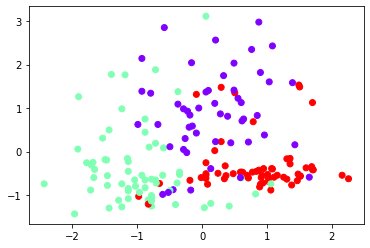

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeans_pp.labels_, cmap='rainbow')
plt.show()

In [ ]:
print(f"For n_clusters = {n_clusters}, Silhouette Score: {silhouette_score(X, kmeans_pp.labels_)}")

For n_clusters = 3, Silhouette Score: 0.2844212860533542


In [ ]:
print(f"For n_clusters = {n_clusters}, Calinski-Harabasz Score: {calinski_harabasz_score(X, kmeans_pp.labels_)}")

For n_clusters = 3, Calinski-Harabasz Score: 70.68777673224996


In [ ]:
print(f"For n_clusters = {n_clusters}, Davies-Bouldin Score: {davies_bouldin_score(X, kmeans_pp.labels_)}")

For n_clusters = 3, Davies-Bouldin Score: 1.3938008647586722


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
from scipy.cluster.vq import vq
codebook = kmeans_pp.cluster_centers_
partition, euc_distance_to_centroids = vq(X, codebook)

tss = np.sum((X-X.mean(0))**2)
sse = np.sum(euc_distance_to_centroids**2)
ssb = tss - sse
print("Cohesion Score: ", sse)
print('-----------------------------------')
print("Seperation Score", ssb)
print('-----------------------------------')

Cohesion Score:  1279.9661527749456
-----------------------------------
Seperation Score 1034.0338472250544
-----------------------------------


In [ ]:
!python /content/drive/MyDrive/ass_4.py

Evaluation Metrics:
-----------------------------------
-----------------------------------
Silhouette Score: 0.45994823920518635
-----------------------------------
Calinski-Harabasz Score: 241.90440170183157
-----------------------------------
Davies-Bouldin Score: 0.8335949464754334
-----------------------------------
Cohesion Score:  139.82049635974982
-----------------------------------
Seperation Score 460.1795036402503
-----------------------------------


### Bisecting K-Means

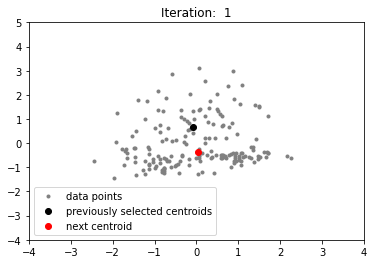

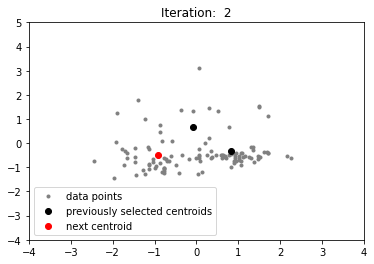

In [ ]:
from sklearn.cluster import KMeans

def plot(data, centroids, next_centroid):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                color = 'black', label = 'previously selected centroids')
    plt.scatter(next_centroid[0], next_centroid[1],
                color = 'red', label = 'next centroid')
    plt.title('Iteration: % d'%(centroids.shape[0]))
     
    plt.legend()
    plt.xlim(-4, 4)
    plt.ylim(-4, 5)
    plt.show()

K = 3
current_clusters = 1
centroids = []
clusters = []
X_ = X

while current_clusters != K:
    kmeans = KMeans(n_clusters=2).fit(X_)
    current_clusters += 1
    # split += 1
    cluster_centers = kmeans.cluster_centers_
    # print(cluster_centers)

    # identify next cluster for kmeans
    sse = [0]*2
    for point, label in zip(X_, kmeans.labels_):
        sse[label] += np.square(point-cluster_centers[label]).sum()
    chosen_cluster = np.argmax(sse, axis=0)
    # print(chosen_cluster)

    # save the other cluster
    centroids.append(cluster_centers[1-chosen_cluster])
    clusters.append(X_[kmeans.labels_ == 1-chosen_cluster])

    # reassign chosen cluster for next iteration
    plot(X_, np.array(centroids), cluster_centers[chosen_cluster])
    chosen_cluster_data = X_[kmeans.labels_ == chosen_cluster]
    X_ = chosen_cluster_data
    # plot_data = clusters.append(X_)
    # print(len(clusters))

centroids.append(X_.mean(0))
clusters.append(X_)

In [ ]:
centroids

[array([-0.07297886,  0.66451047,  0.18987553,  0.51662255, -0.15468782,
        -0.94370681, -1.04663574,  0.83794915, -0.71615568,  0.54346866,
        -0.88207198, -1.06931809, -0.45318098]),
 array([ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]),
 array([-0.92236791, -0.47758784, -0.68536635,  0.08336068, -0.5050132 ,
         0.12659266,  0.1452257 , -0.38464973,  0.207301  , -0.90061566,
         0.54799397,  0.41553638, -0.7902887 ])]

In [ ]:
len(clusters)

3

In [ ]:
labels = np.zeros(X.shape[0])
labels[clusters[0].shape[0]:clusters[0].shape[0]+clusters[1].shape[0]] = 1
labels[clusters[0].shape[0]+clusters[1].shape[0]:] = 2

In [ ]:
labels = labels.astype(int)

In [ ]:
X_ = np.array([item for sublist in clusters for item in sublist])


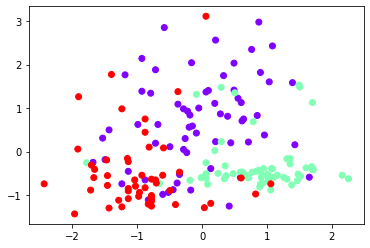

In [ ]:
plt.scatter(X_[:,0], X_[:,1], c=labels, cmap='rainbow')
plt.show()

In [ ]:
print(f"Silhouette Score: {silhouette_score(X, labels)}")

Silhouette Score: 0.2494951780393308


In [ ]:
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X, labels)}")

Calinski-Harabasz Score: 57.90053970822046


In [ ]:
print(f"Davies-Bouldin Score: {davies_bouldin_score(X, labels)}")

Davies-Bouldin Score: 1.574223178306152


In [ ]:
from scipy.cluster.vq import vq
codebook = centroids
partition, euc_distance_to_centroids = vq(X_, codebook)

tss = np.sum((X_-X_.mean(0))**2)
sse = np.sum(euc_distance_to_centroids**2)
ssb = tss - sse
print("Cohesion Score: ", sse)
print('-----------------------------------')
print("Seperation Score", ssb)
print('-----------------------------------')


Cohesion Score:  1303.5527135207053
-----------------------------------
Seperation Score 1010.4472864792947
-----------------------------------


In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

### Hierarchical

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
linked = linkage(X, 'single')

In [ ]:
labelList = range(X.shape[0]+1)

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation ='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

AGNES - Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [ ]:
print("Cluster Labels:")
print(cluster.labels_)

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


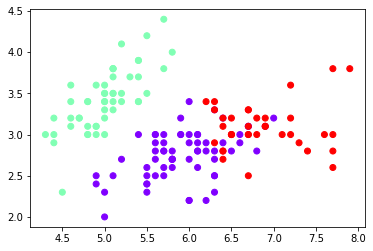

In [ ]:
plt.scatter(X[:,0], X[:, 1], c=cluster.labels_, cmap='rainbow')
plt.show()

In [ ]:
print(f"For n_clusters = {n_clusters}, Silhouette Score: {silhouette_score(X, cluster.labels_)}")

For n_clusters = 3, Silhouette Score: 0.5543236611296415


In [ ]:
print(f"For n_clusters = {n_clusters}, Calinski-Harabasz Score: {calinski_harabasz_score(X, cluster.labels_)}")

For n_clusters = 3, Calinski-Harabasz Score: 558.0580408128307


In [ ]:
print(f"For n_clusters = {n_clusters}, Davies-Bouldin Score: {davies_bouldin_score(X, cluster.labels_)}")

For n_clusters = 3, Davies-Bouldin Score: 0.6562564540642065


BIRCH

In [ ]:
from sklearn.cluster import Birch

In [ ]:
n_clusters = 3

In [ ]:
birch = Birch(n_clusters=n_clusters)
birch.fit(X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
      threshold=0.5)

In [ ]:
print("Cluster Labels:")
print(birch.labels_)

Cluster Labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


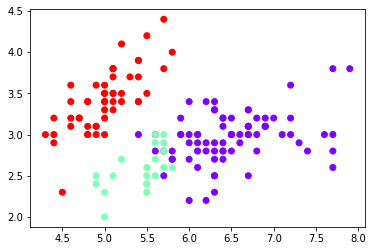

In [ ]:
plt.scatter(X[:,0], X[:,1], c=birch.labels_, cmap='rainbow')
plt.show()

In [ ]:
print(f"For n_clusters = {n_clusters}, Silhouette Score: {silhouette_score(X, birch.labels_)}")

For n_clusters = 3, Silhouette Score: 0.5019524848046075


In [ ]:
print(f"For n_clusters = {n_clusters}, Calinski-Harabasz Score: {calinski_harabasz_score(X, birch.labels_)}")

For n_clusters = 3, Calinski-Harabasz Score: 458.47251055625765


In [ ]:
print(f"For n_clusters = {n_clusters}, Davies-Bouldin Score: {davies_bouldin_score(X, birch.labels_)}")

For n_clusters = 3, Davies-Bouldin Score: 0.6258305924331691


### Density based Clustering

DBSCAN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


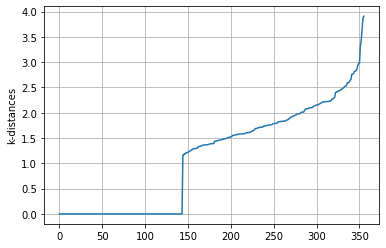

In [ ]:
def k_distances2(x, k):
    dim0 = x.shape[0]
    dim1 = x.shape[1]
    p=-2*x.dot(x.T)+np.sum(x**2, axis=1).T+ np.repeat(np.sum(x**2, axis=1),dim0,axis=0).reshape(dim0,dim0)
    p = np.sqrt(p)
    p.sort(axis=1)
    p=p[:,:k]
    pm= p.flatten()
    pm= np.sort(pm)
    return p, pm
m, m2= k_distances2(X, 2)
plt.plot(m2)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=26).fit(X)

In [ ]:
print("Cluster Labels:")
print(dbscan.labels_)

Cluster Labels:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0 -1  0 -1 -1  0  0
  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
 -1  0  0 -1  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  1  0
  0 -1  0 -1 -1  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]


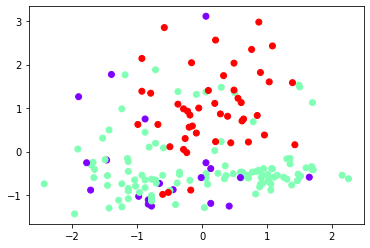

In [ ]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.show()

In [ ]:

print(f"Silhouette Score: {silhouette_score(X, dbscan.labels_)}")

Silhouette Score: 0.22490883609486223


In [ ]:
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X, dbscan.labels_)}")

Calinski-Harabasz Score: 32.18955089061222


In [ ]:
print(f"Davies-Bouldin Score: {davies_bouldin_score(X, dbscan.labels_)}")

Davies-Bouldin Score: 3.6152937209272955


**ROUGH**

In [ ]:
!python3 ass4.py

In [ ]:
!python /content/drive/MyDrive/ass_4.py

In [ ]:
X.shape[1]

13

IRIS DATASET


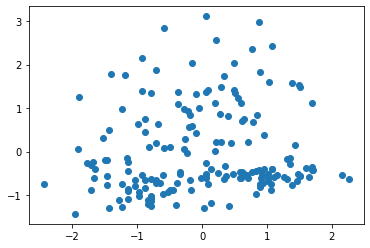

KMEANS


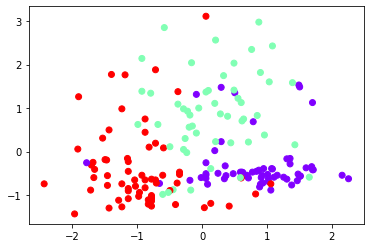

Evaluation Metrics:
-----------------------------------
-----------------------------------
Silhouette Score: 0.2848589191898987
-----------------------------------
Calinski-Harabasz Score: 70.9400080031512
-----------------------------------
Davies-Bouldin Score: 1.3891879777181646
-----------------------------------
Cohesion Score:  1277.9284888446423
-----------------------------------
Seperation Score 1036.0715111553577
-----------------------------------
AGNES


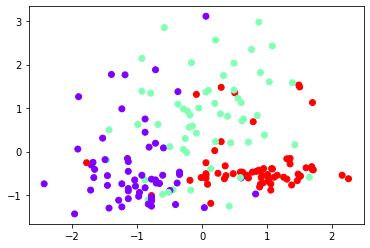

Evaluation Metrics:
-----------------------------------
-----------------------------------
Silhouette Score: 0.2774439826952266
-----------------------------------
Calinski-Harabasz Score: 67.6474675044098
-----------------------------------
Davies-Bouldin Score: 1.4185919431857321
-----------------------------------
Cohesion Score:  1284.4160690158492
-----------------------------------
Seperation Score 1029.5839309841508
-----------------------------------
BIRCH


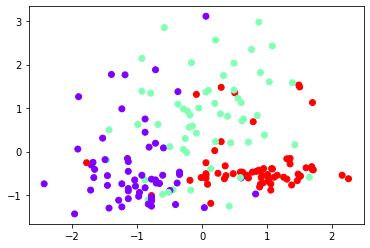

Evaluation Metrics:
-----------------------------------
-----------------------------------
Silhouette Score: 0.2774439826952266
-----------------------------------
Calinski-Harabasz Score: 67.6474675044098
-----------------------------------
Davies-Bouldin Score: 1.4185919431857321
-----------------------------------
Cohesion Score:  1284.4160690158492
-----------------------------------
Seperation Score 1029.5839309841508
-----------------------------------
DBSCAN


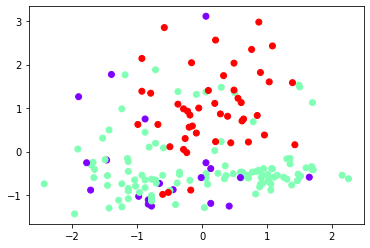

Evaluation Metrics:
-----------------------------------
-----------------------------------
Silhouette Score: 0.22490883609486223
-----------------------------------
Calinski-Harabasz Score: 32.18955089061222
-----------------------------------
Davies-Bouldin Score: 3.6152937209272955
-----------------------------------
Cohesion Score:  1611.002310855536
-----------------------------------
Seperation Score 702.997689144464
-----------------------------------
OPTICS


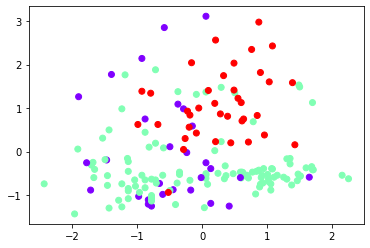

Evaluation Metrics:
-----------------------------------
-----------------------------------
Silhouette Score: 0.19886298678377584
-----------------------------------
Calinski-Harabasz Score: 28.105332462765027
-----------------------------------
Davies-Bouldin Score: 3.099526456109523
-----------------------------------
Cohesion Score:  1589.2652532102247
-----------------------------------
Seperation Score 724.7347467897753
-----------------------------------


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans

from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def preprocess_data(key):
    data_dict = {
        'iris': load_iris(),
        'wine': load_wine()
    }

    data = data_dict[key]
    X = scale(data.data)
    y = data.target

    return X, y

def display_scatter_plot(X, model=None, clustered=False):
    if not clustered:
        plt.scatter(X[:,0], X[:,1], label='True Position')
        plt.show()
    else:
        plt.scatter(X[:,0], X[:,1], c=model.labels_, cmap='rainbow')
        plt.show()

def evaluation_metrics_1(X, model):
    print("Evaluation Metrics:")
    print("-----------------------------------")
    print("-----------------------------------")
    print(f"Silhouette Score: {silhouette_score(X, model.labels_)}")
    print("-----------------------------------")
    print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X, model.labels_)}")
    print("-----------------------------------")
    print(f"Davies-Bouldin Score: {davies_bouldin_score(X, model.labels_)}")
    print("-----------------------------------")


def evaluation_metrics_2(X, model, kmeans=True):
    from scipy.cluster.vq import vq
    n_clusters = 3
    if kmeans:
      codebook = model.cluster_centers_
    else:
      # labels = model.labels_
      # labels[labels == -1] = 2
      codebook = []
      for i in np.unique(model.labels_):
        cluster_data = X[model.labels_ == i]
        centroid = cluster_data.mean(0)
        codebook.append(centroid)

    partition, euc_distance_to_centroids = vq(X, codebook)

    tss = np.sum((X-X.mean(0))**2)
    sse = np.sum(euc_distance_to_centroids**2)
    ssb = tss - sse
    print("Cohesion Score: ", sse)
    print('-----------------------------------')
    print("Seperation Score", ssb)
    print('-----------------------------------')

def create_dendrogram(X, y):
    from scipy.cluster.hierarchy import dendrogram, linkage
    linked = linkage(X, 'single')
    labelList = range(X.shape[0]+1)

    dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True)
    plt.savefig("dgram_iris.png")

print("IRIS DATASET")
X, y = preprocess_data('wine')
display_scatter_plot(X)
n_clusters = 3

print("KMEANS")
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters).fit(X)
display_scatter_plot(X, kmeans, True)
evaluation_metrics_1(X=X, model=kmeans)
evaluation_metrics_2(X=X, model=kmeans)

print("AGNES")
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward').fit(X)
display_scatter_plot(X, cluster, True)
evaluation_metrics_1(X=X, model=cluster)
evaluation_metrics_2(X=X, model=cluster, kmeans=False)

print("BIRCH")
from sklearn.cluster import Birch
birch = Birch(n_clusters=n_clusters).fit(X)
display_scatter_plot(X, birch, True)
evaluation_metrics_1(X=X, model=birch)
evaluation_metrics_2(X=X, model=birch, kmeans=False)

print("DBSCAN")
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=26).fit(X)
display_scatter_plot(X, dbscan, True)
evaluation_metrics_1(X=X, model=dbscan)
evaluation_metrics_2(X=X, model=dbscan, kmeans=False)

print("OPTICS")
from sklearn.cluster import OPTICS
optics = OPTICS(max_eps=3, min_samples=26).fit(X)
display_scatter_plot(X, optics, True)
evaluation_metrics_1(X=X, model=optics)
evaluation_metrics_2(X=X, model=optics, kmeans=False)
